### ЗАДАНИЕ
1. Написать программу, реализующую метод формирования двумерной случайной величины.
2. Выполнить статистическое исследование полученной величины(построение эмпирической матрицы распределения, гистограммы составляющих вектора, вычисление точечных, интервальных оценок, коэффициент корреляции)
3. Проверить гипотезы о соответствии полученных оценок характеристик случайной величины требуемым

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

seed = 1
np.random.seed(1)
uni = np.random.uniform
N = 10**4

#### 1. Написать программу, реализующую метод формирования двумерной случайной величины.

Для начала сформируем матрицу вероятностей для исходного двумерного вектора $(X, Y)$.

In [2]:
prob_mtrx = np.array([
    [.01, .02, .3],
    [.2,  .02, .1],
    [.2,  .05, .1]
])

Проверим: является ли prob_mtrx стохастической матрицей

In [3]:
sum(sum(prob_mtrx))

1.0

Функция для генерации величины $X$(строки)

In [4]:
def generate_X():
    q = np.array([sum(row) for row in prob_mtrx])
    l = np.array([sum(q[:i]) for i in range(len(q))])
    cdf_X = l
    return np.argmax(l[l < uni()])

Функция для генерации $Y\mid X=x$

In [5]:
def generate_Y_x(x):
    r = np.array([sum(prob_mtrx[x, :i]) for i in range(prob_mtrx.shape[1])]) / sum(prob_mtrx[x, :])
    
    return np.argmax(r[r < uni()])

Функция генерация $(X, Y)$

In [6]:
def generate_X_Y():
    x = generate_X()
    y = generate_Y_x(x)
    return (x, y)

#### 2. Выполнить статистическое исследование полученной величины(построение эмпирической матрицы распределения, гистограммы составляющих вектора, вычисление точечных, интервальных оценок, коэффициент корреляции)

Сгенерируем выборку $(X, Y)$ размера $N$

In [7]:
sample = np.array([generate_X_Y() for _ in range(N)])
sample_X = sample[:, 0] 
sample_Y = sample[:, 1]

**Построим эмпирическую матрицу распределения**

In [8]:
def sample_i_j_frequency(i, j, sample):
    amount = 0
    for row in sample:
        if (row[0], row[1]) == (i, j):
            amount += 1
    return amount / len(sample)

In [9]:
nrows, ncols  = prob_mtrx.shape
mtrx = []
for i in range(nrows):
    mtrx.append([])
    for j in range(ncols):
        mtrx[i].append(sample_i_j_frequency(i, j, sample))
mtrx = np.array(mtrx)

In [10]:
sum(sum(mtrx))

1.0

In [11]:
mtrx

array([[0.0111, 0.0198, 0.2954],
       [0.2   , 0.0197, 0.1008],
       [0.1993, 0.0504, 0.1035]])

**Построим гистограммы составляющих вектора**

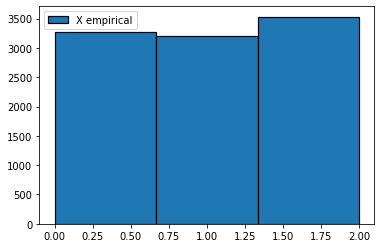

In [12]:
plt.hist(sample_X, bins=3, edgecolor='black', linewidth=1.2, label='X empirical')
plt.legend()
plt.show()

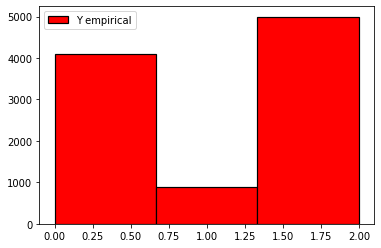

In [13]:
plt.hist(sample_Y, bins=3, edgecolor='black', linewidth=1.2, label='Y empirical', color='red')
plt.legend()
plt.show()

**Сделаем точечные и интервальные оценки**

Точечные оценки

In [14]:
print(f'Точечная оценка EX: {sample_X.mean()}')
print(f'Точечная оценка Var(X): {sample_X.var()}')
print(f'Точечная оценка EY: {sample_Y.mean()}')
print(f'Точечная оценка Var(Y): {sample_Y.var()}')

Точечная оценка EX: 1.0269
Точечная оценка Var(X): 0.6787763900000001
Точечная оценка EY: 1.0893
Точечная оценка Var(Y): 0.9021255099999999


Интервальные оценки

Т.к. размеры выборки большие, а дисперсии исходных распределений ограничены мы можем применить закон больших чисел и предположить, что матожидания исходных СВ распределены нормально

In [15]:
import scipy.stats as st

print(f'95% confidence interval for X: {st.norm.interval(0.95, loc=np.mean(sample_X), scale=st.sem(sample_X))}')
print(f'95% confidence interval for Y: {st.norm.interval(0.95, loc=np.mean(sample_Y), scale=st.sem(sample_Y))}')

95% confidence interval for X: (1.010751463453684, 1.0430485365463158)
95% confidence interval for Y: (1.0706832747771775, 1.1079167252228224)


**Оцениним коэффициент корреляции**

Построим матрицу корреляции $ Corr(X, Y) $

In [16]:
print(f'Corr(X, Y): \n {np.corrcoef(sample_X, sample_Y)}')

Corr(X, Y): 
 [[ 1.        -0.4888066]
 [-0.4888066  1.       ]]


#### Проверить гипотезы о соответствии полученных оценок характеристик случайной величины требуемым

Для начала получим хар-ки исходных $X_{real}, Y_{real}$

In [37]:
n_values = 3
prob_X = [sum(prob_mtrx[i, :]) for i in range(3)]
prob_Y = [sum(prob_mtrx[:, i]) for i in range(3)]
mean_X = sum([i * prob_X[i] for i in range(3)])
mean_Y = sum([i * prob_Y[i] for i in range(3)])
var_X  = sum([(i - mean_X)**2 * prob_X[i] for i in range(3)])
var_Y  = sum([(i - mean_Y)**2 * prob_X[i] for i in range(3)])
print(f'Исходная EX: {sample_X.mean()}')
print(f'Исходная Var(X): {sample_X.var()}')
print(f'Исходная EY: {sample_Y.mean()}')
print(f'Исходная Var(Y): {sample_Y.var()}')

Исходная EX: 1.0269
Исходная Var(X): 0.6787763900000001
Исходная EY: 1.0893
Исходная Var(Y): 0.9021255099999999


Проверим гипотезы о соответсвии матожиданий

Т.к. $X_{sample}\sim Bin(p_{X}, n)\wedge Y_{sample}\sim Bin(p_{Y}, n)$  и lim_{n \to \infty }Bin(n, p)=N(np, pq), а в нашем случае n достаточно велико, мы може воспользоваться z-statistic для проверки гипотезы

**Проверим гипотезу о разенстве $EX_{sample}$ и $EX_{real}$**

С ${H_0}: EX_{sample}=EX_{real}$

In [63]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

In [64]:
ztest ,pval = stests.ztest(sample_X, x2=None, value=mean_X)
print(f'p-value: {float(pval)}')
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.4023341188083658
accept null hypothesis


**Проверим гипотезу о разенстве $EY_{sample}$ и $EY_{real}$**

С ${H_0}: EY_{sample}=EY_{real}$

In [65]:
ztest ,pval = stests.ztest(sample_Y, x2=None, value=mean_Y)
print(f'p-value: {float(pval)}')
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.9412524266910858
accept null hypothesis


**Проверим гипотезу о разенстве $VarY_{sample}$ и $VarY_{real}$**

С ${H_0}: VarY_{sample}=VarY_{real}$ и $H_{a}: VarY_{sample} > VarY_{real}$

Проверяя гипотезу будет исходить из $\frac{(n - 1)S^{2}}{\sigma_{0}^{2}} \sim \chi^{2}_{n-1}$ при большом n
________________________________


Посчитаем $\frac{(n - 1)S^{2}}{\sigma_{0}^{2}}$

In [66]:
import scipy

In [71]:
df = len(sample_X) - 1
statistics = df * sample_X.var() / var_X
pvalue = 1 - scipy.stats.chi2.cdf(statistics, df)
print(f'p-value: {pvalue}')

p-value: 0.5322830533338042


Принимаем нулевую гипотезу

**Проверим гипотезу о разенстве $VarX_{sample}$ и $VarX_{real}$**

С ${H_0}: VarX_{sample}=VarX_{real}$ и $H_{a}: VarX_{sample} > VarX_{real}$

In [72]:
df = len(sample_Y) - 1
statistics = df * sample_Y.var() / var_Y
pvalue = 1 - scipy.stats.chi2.cdf(statistics, df)
print(f'p-value: {pvalue}')

p-value: .6758902342348


Принимаем нулевую гипотезу